In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
PATCH_PATH = ('cylinder2_rgba_small')

In [4]:
X_train, y_train, X_test, y_test = gp.Patch.load_rgba(PATCH_PATH)

Loaded /home/d/patches//cylinder2_rgba_small/ in 0.16304898262 seconds.


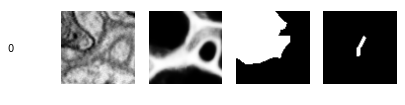

In [22]:
gp.Util.view_rgba(X_train[100], y_train[100])

In [25]:
cnn = nets.RGBANet()

CNN configuration: 
    Our CNN with image, prob, merged_array and border overlap as RGBA.

    This includes dropout.
    


In [26]:
cnn = cnn.fit(X_train, y_train)

# Neural Network with 7134066 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     4x75x75
  1  conv1     64x73x73
  2  pool1     64x36x36
  3  dropout1  64x36x36
  4  conv2     48x34x34
  5  pool2     48x17x17
  6  dropout2  48x17x17
  7  hidden3   512
  8  dropout3  512
  9  output    2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.29179       0.21075      1.38452      0.91803  25.29s
      2       0.19556       0.17478      1.11886      0.93354  25.28s
      3       0.16524       0.14738      1.12112      0.94464  25.27s
      4       0.13552       0.12874      1.05263      0.95317  25.35s
      5       0.10431       0.09559      1.09123      0.96613  25.33s
      6       0.07986       0.07920      1.00832      0.97178  25.30s
      7       0.06338       0.06350      0.99820      0.98082  25.37s
      8       0.04695       0.08

In [32]:
cnn = cnn.fit(X_train, y_train)

     36       0.00240       0.04912      0.04885      0.99189  25.31s
     37       0.00263       0.05617      0.04687      0.99162  25.25s
     38       0.00337       0.04676      0.07214      0.99225  25.36s
     39       0.00368       0.04230      0.08706      0.99225  25.45s
     40       0.00460       0.05154      0.08920      0.99171  25.46s
     41       0.00199       0.05178      0.03845      0.99153  25.46s
     42       0.00164       0.05414      0.03024      0.99117  25.46s
     43       0.00164       0.04746      0.03447      0.99279  25.45s
     44       0.00257       0.07061      0.03645      0.99016  25.45s
     45       0.00272       0.04788      0.05684      0.99261  25.47s
     46       0.00322       0.05044      0.06374      0.99225  25.45s
     47       0.00142       0.04915      0.02895      0.99189  25.46s
     48       0.00497       0.06113      0.08135      0.99180  25.45s
     49       0.00319       0.04843      0.06594      0.99279  25.45s
     50       0.0030

In [33]:
test_accuracy = cnn.score(X_test, y_test)

In [34]:
test_accuracy

0.9254780652418447

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

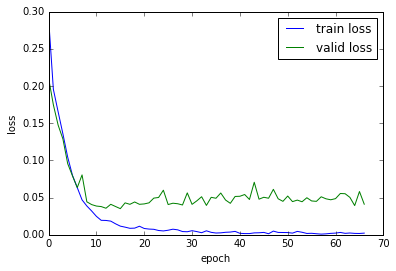

In [35]:
plot_loss(cnn)

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

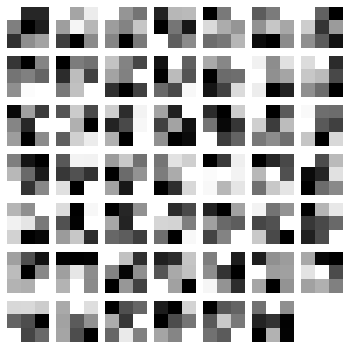

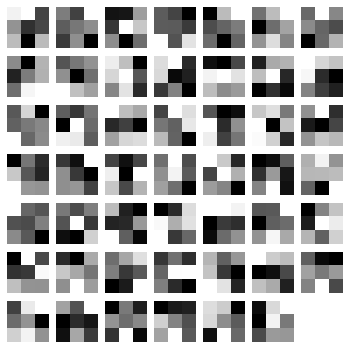

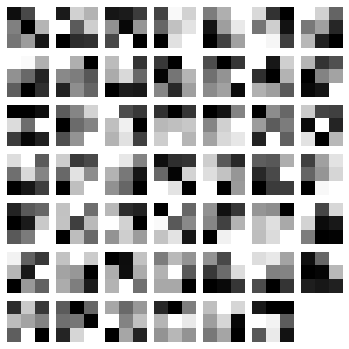

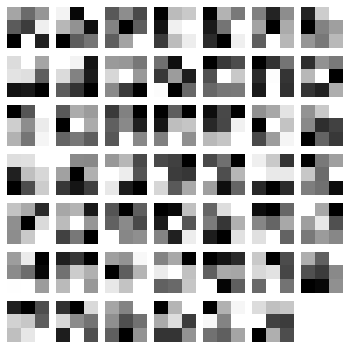

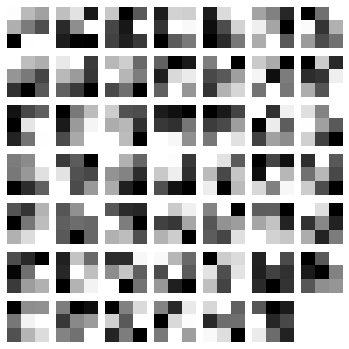

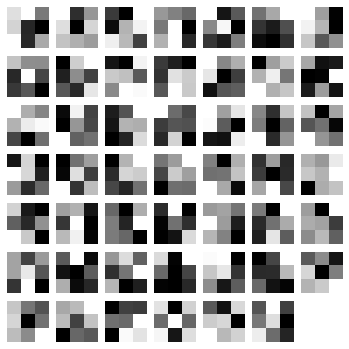

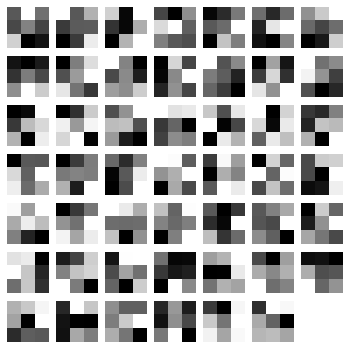

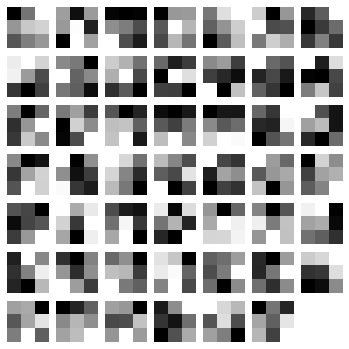

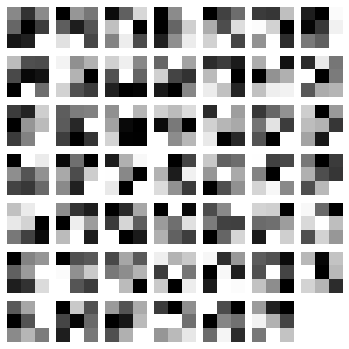

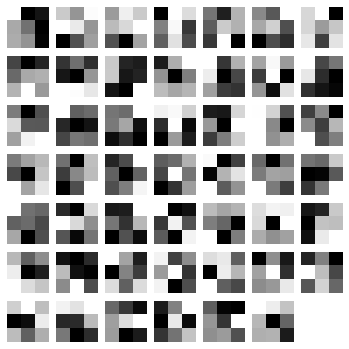

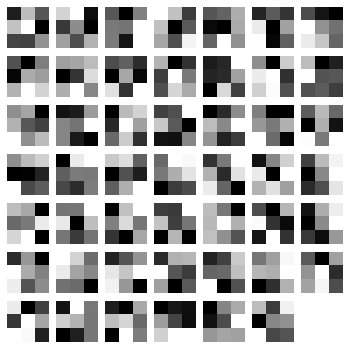

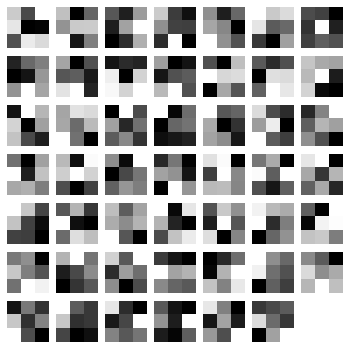

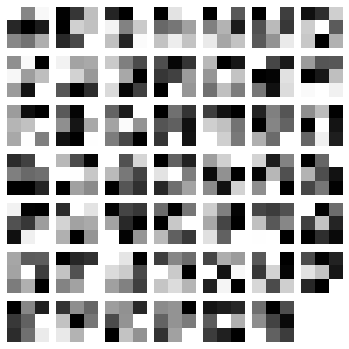

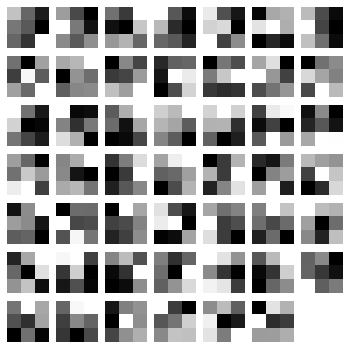

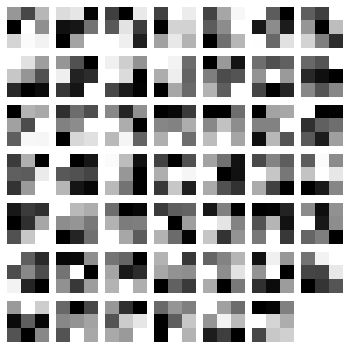

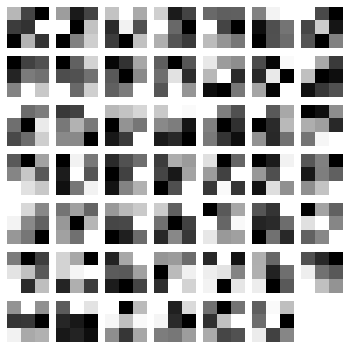

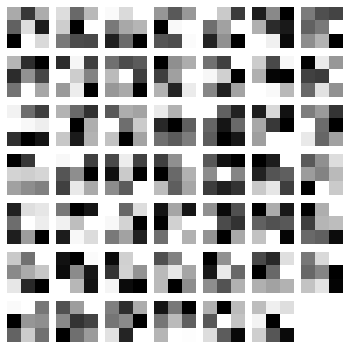

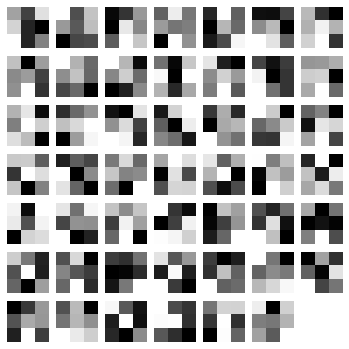

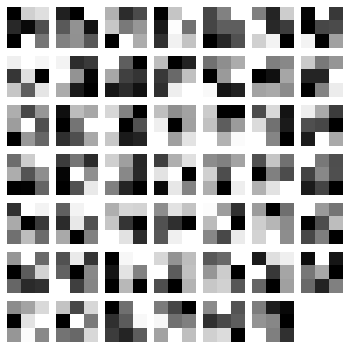

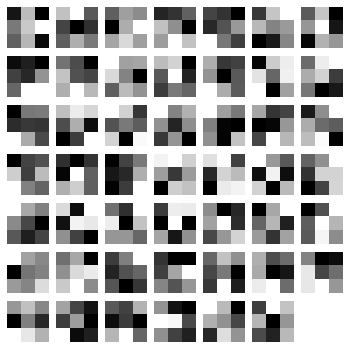

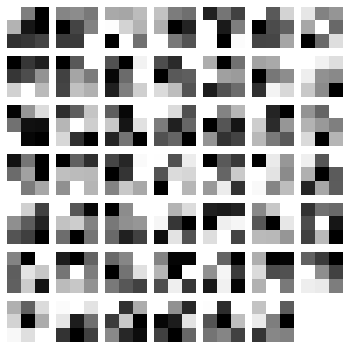

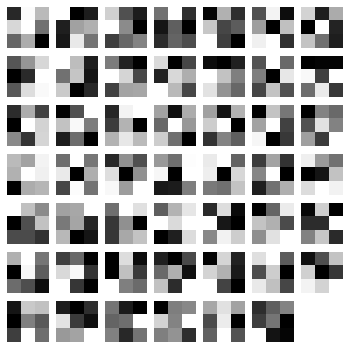

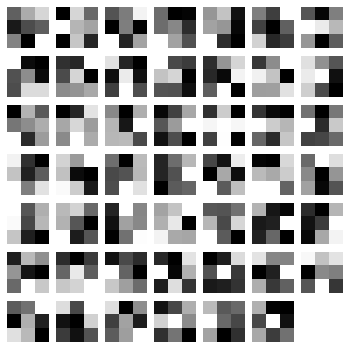

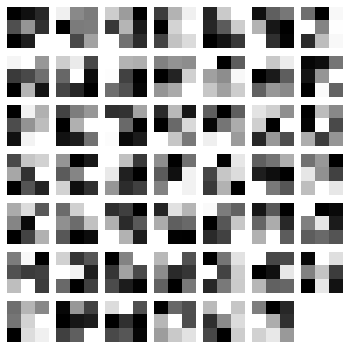

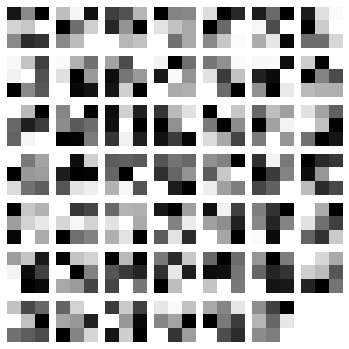

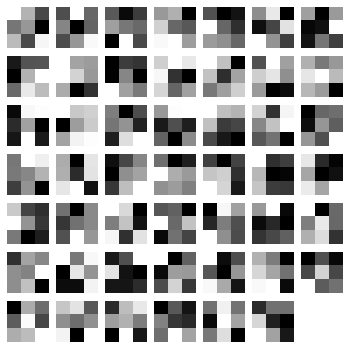

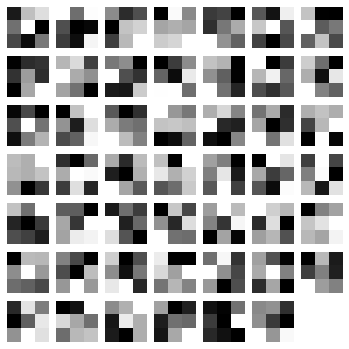

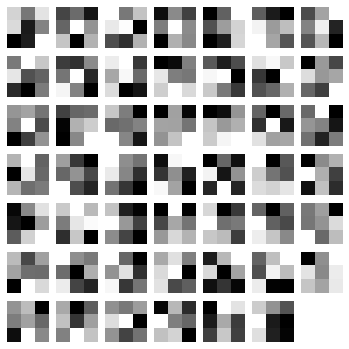

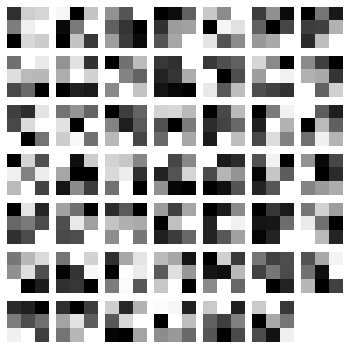

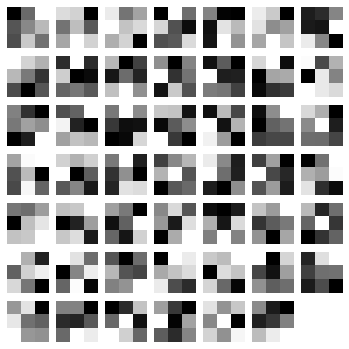

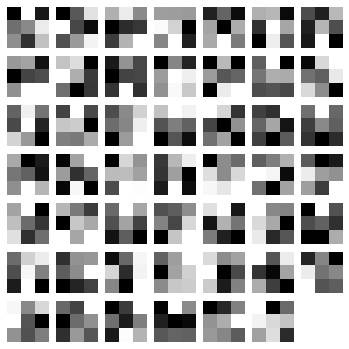

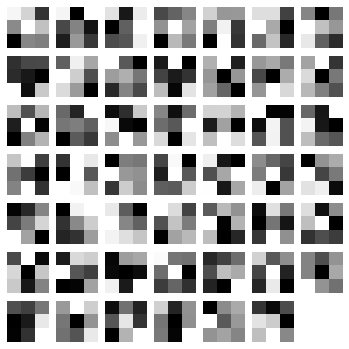

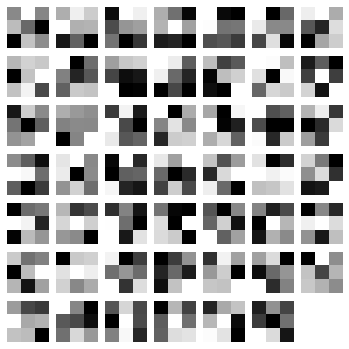

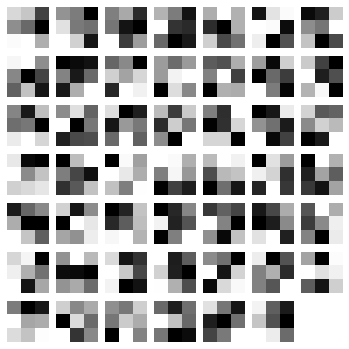

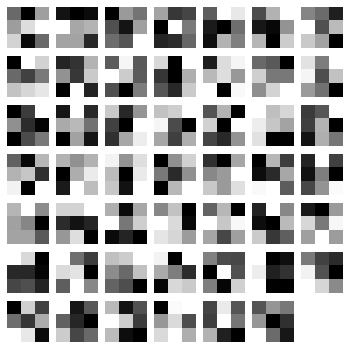

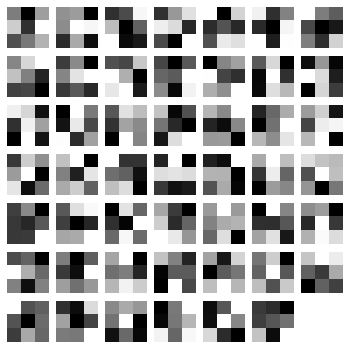

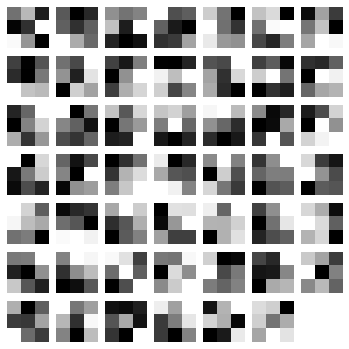

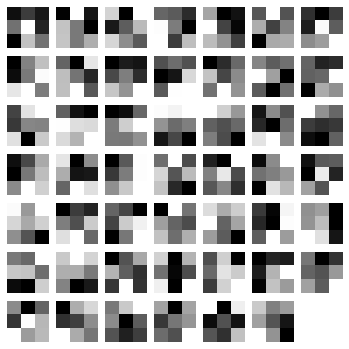

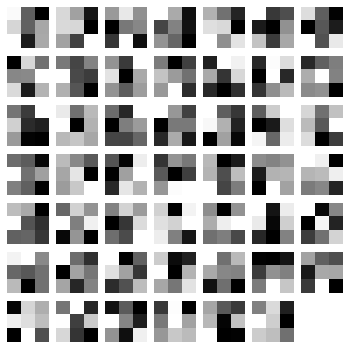

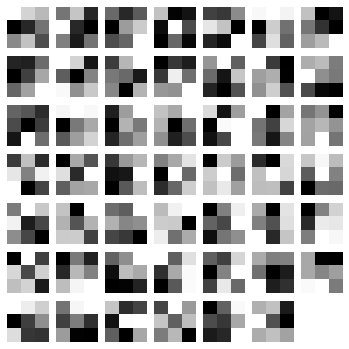

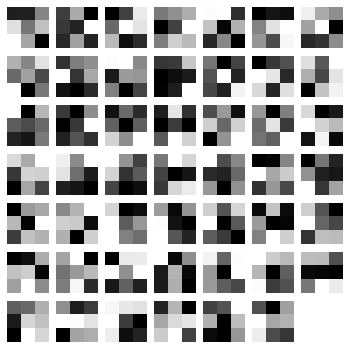

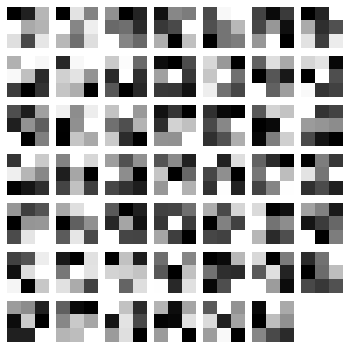

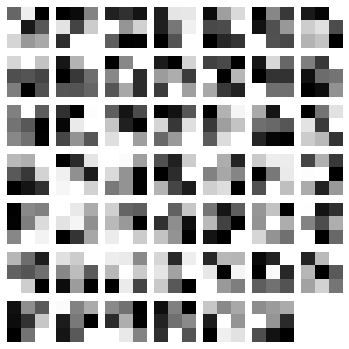

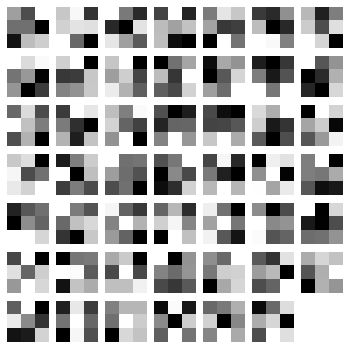

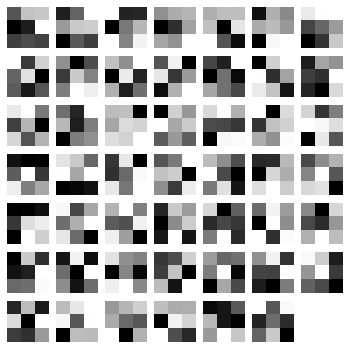

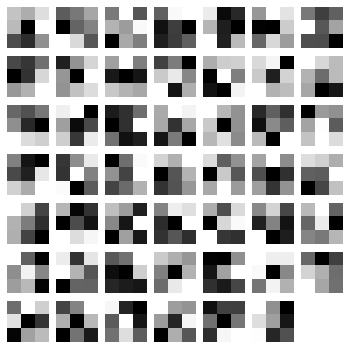

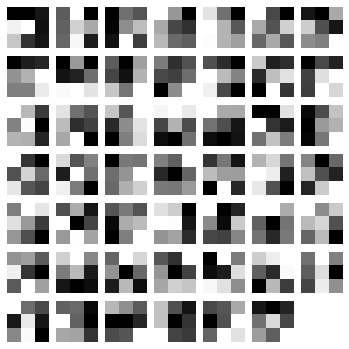

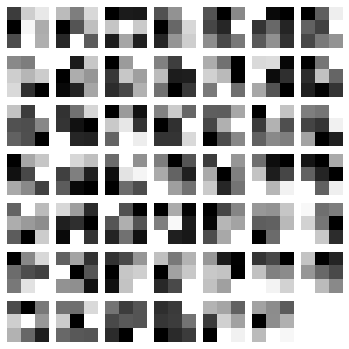

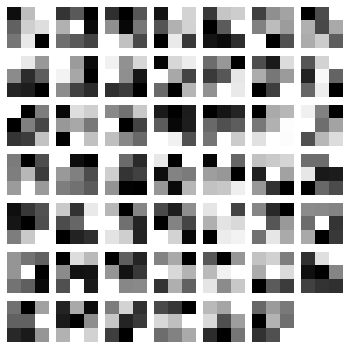

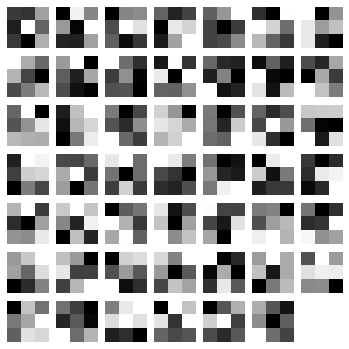

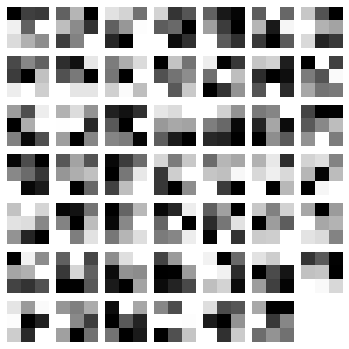

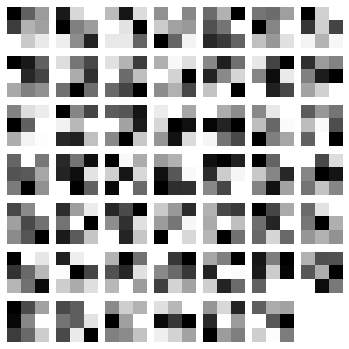

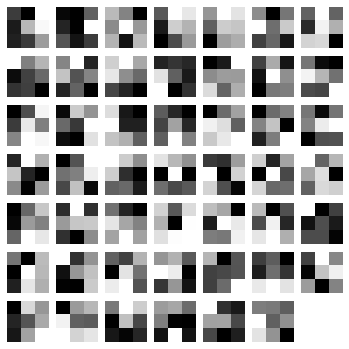

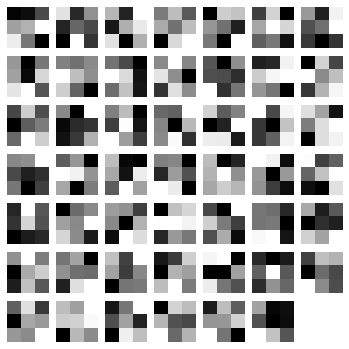

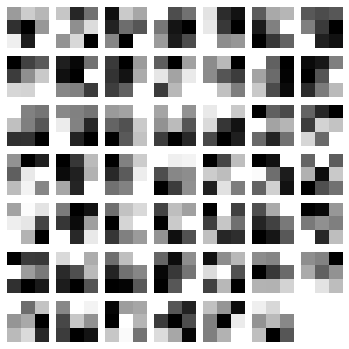

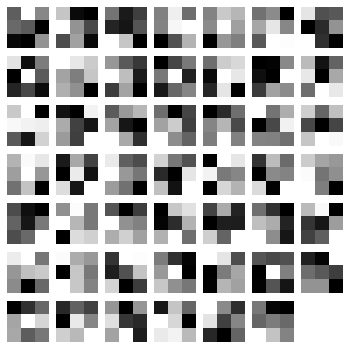

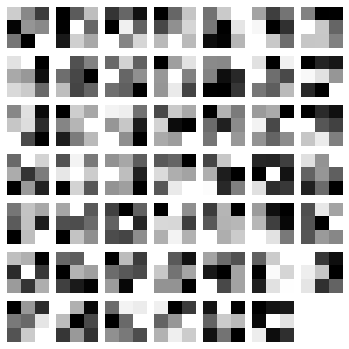

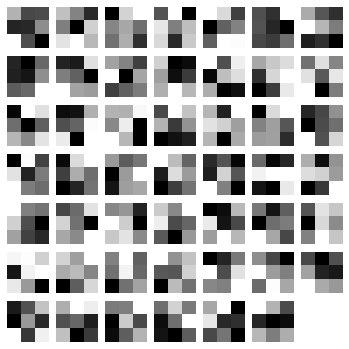

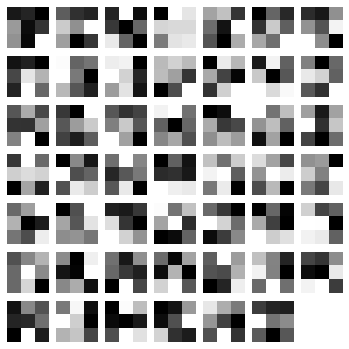

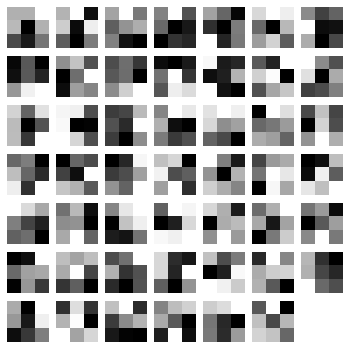

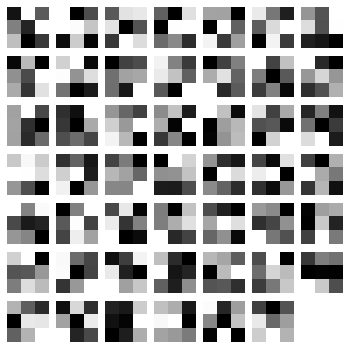

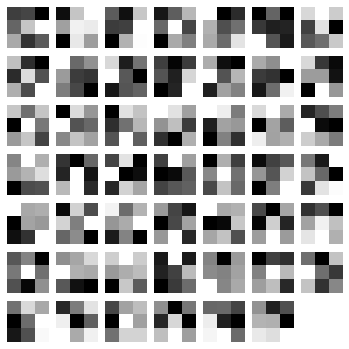

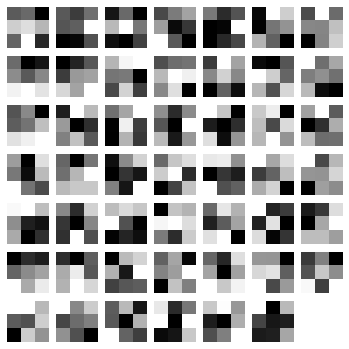

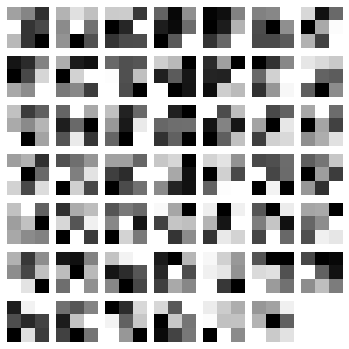

In [46]:
plot_conv_weights(cnn.layers_['conv2'])

In [48]:
# store CNN
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/RGBA.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)

In [5]:
with open(os.path.expanduser('~/Projects/gp/nets/RGBA.p'), 'rb') as f:
  net = pickle.load(f)

In [7]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


In [8]:
test_prediction = net.predict(X_test)
test_prediction_prob = net.predict_proba(X_test)
print
print 'Precision/Recall:'
print classification_report(y_test, test_prediction)


Precision/Recall:
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      3556
          1       0.96      0.89      0.92      3556

avg / total       0.93      0.93      0.93      7112

